<a href="https://colab.research.google.com/github/sakanabil/Machine-Learning_25/blob/main/TG4_2341720108_SAKA_NABIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/Iris.csv')

df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

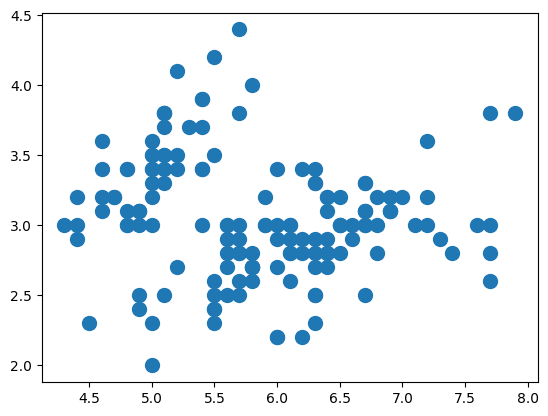

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

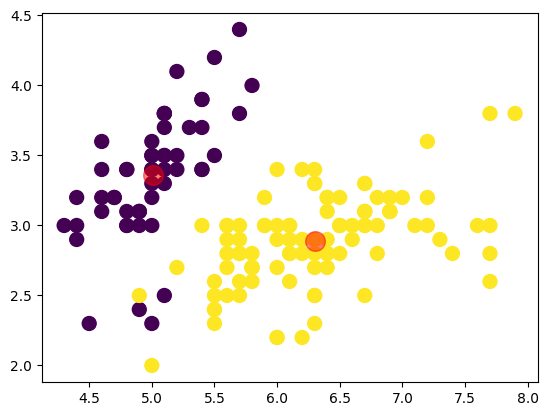

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


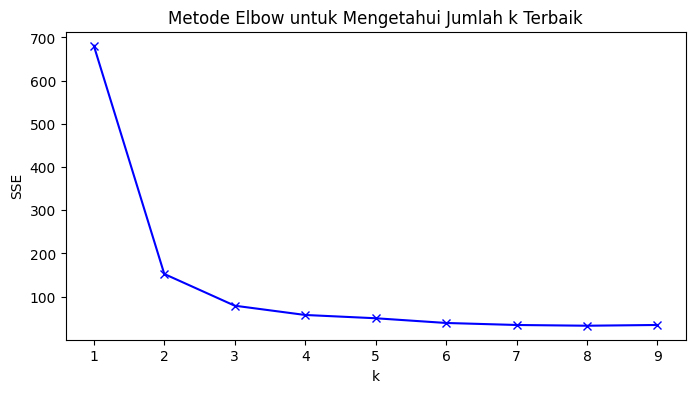

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.4732732654949
k=5; SSE=49.876430957802604
k=6; SSE=38.96478785103787
k=7; SSE=34.299985543844244
k=8; SSE=32.5921908091908
k=9; SSE=34.32035744206773


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

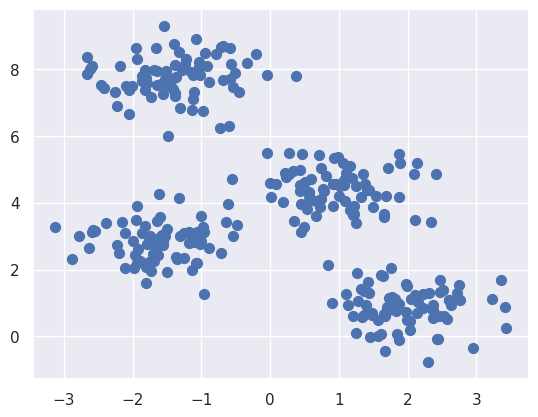

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

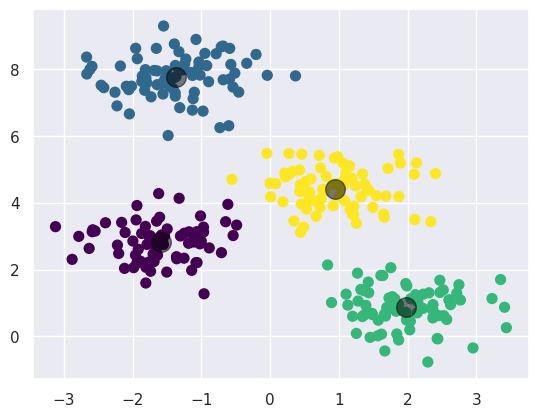

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

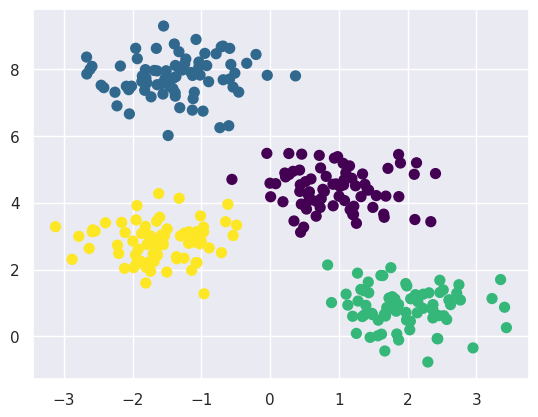

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

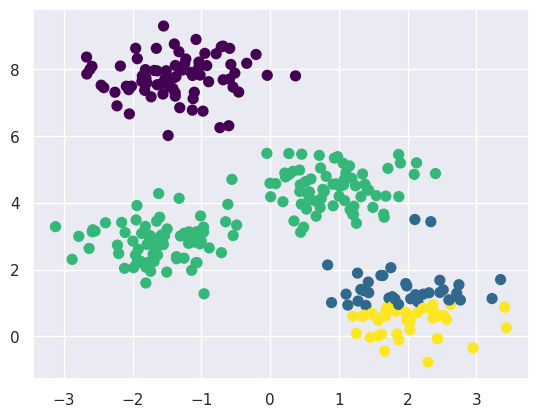

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

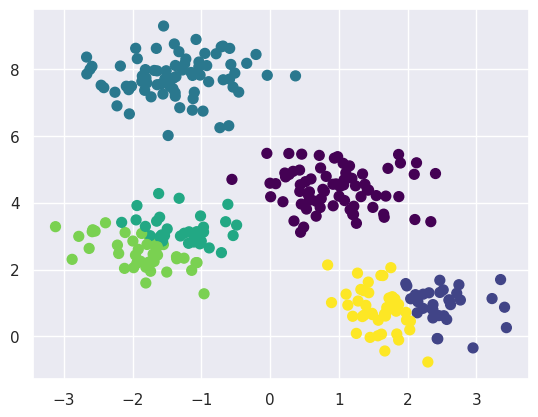

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

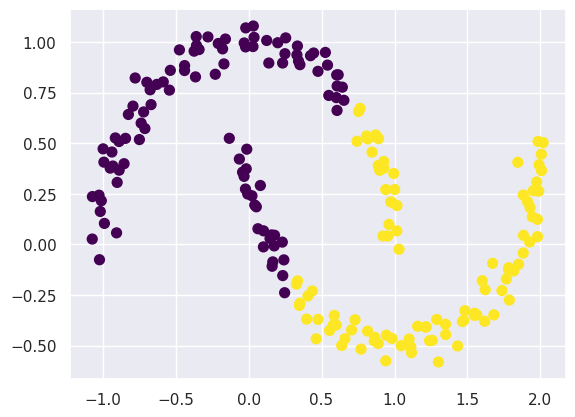

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


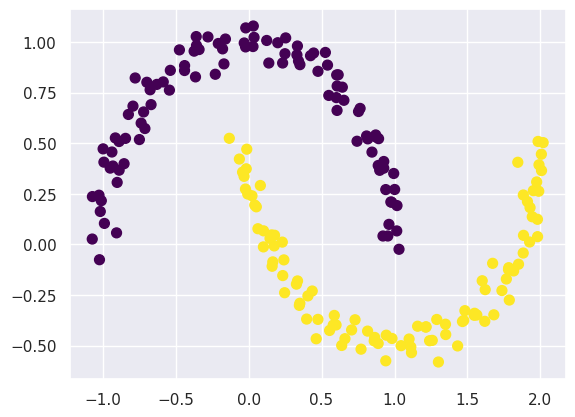

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

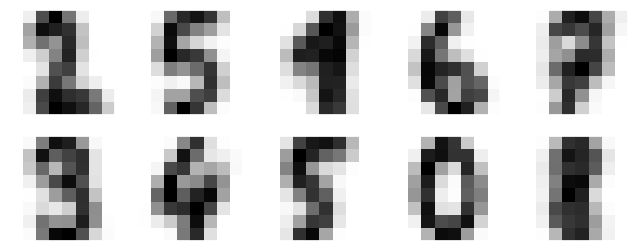

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

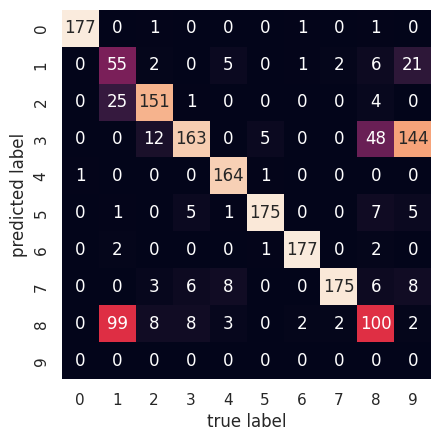

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

# STUDI KASUS 2

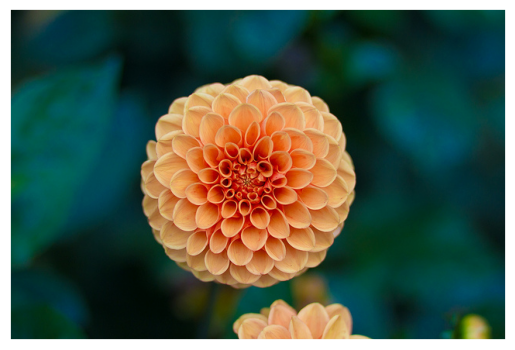

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

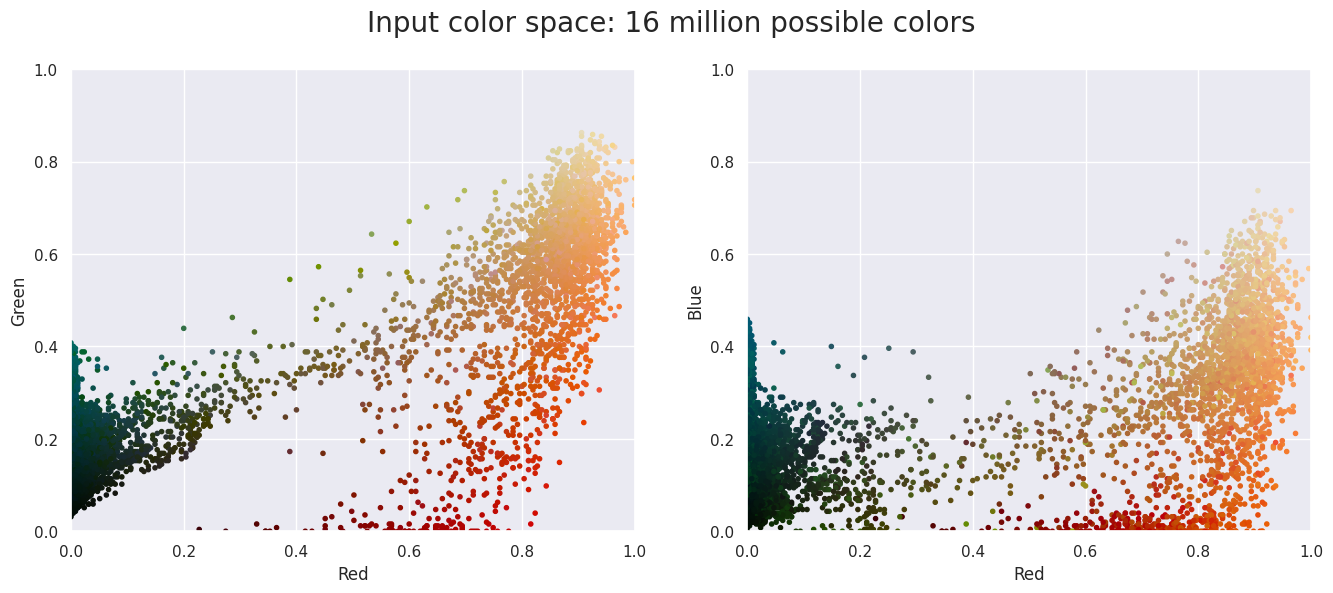

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

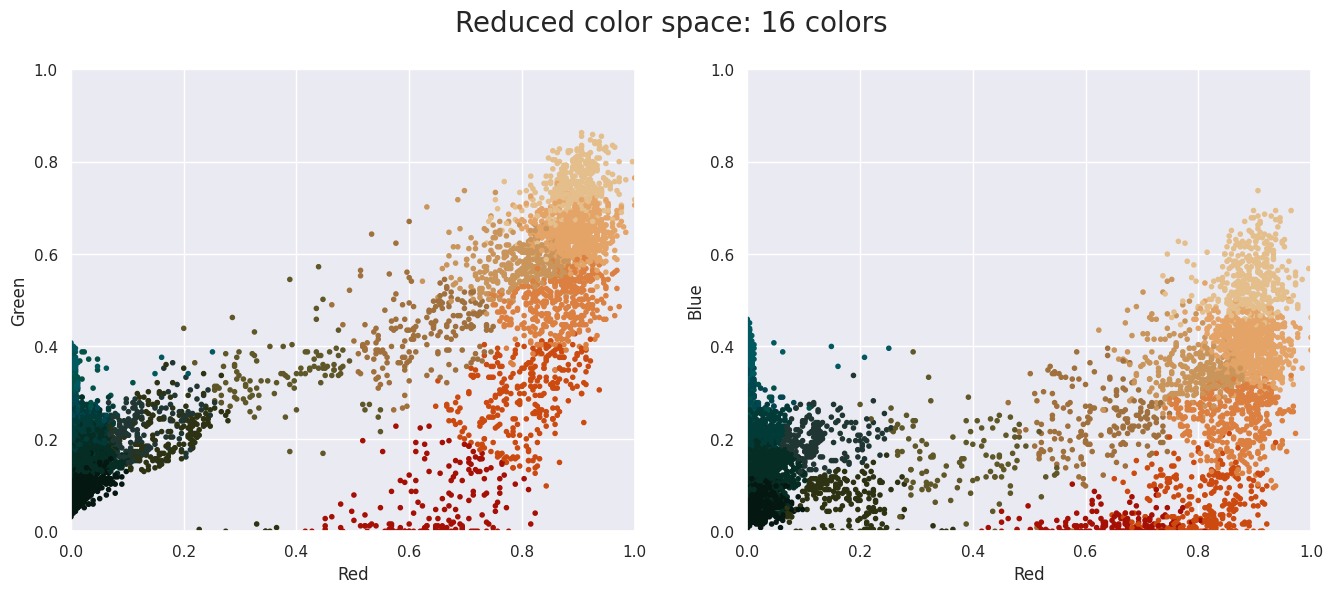

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

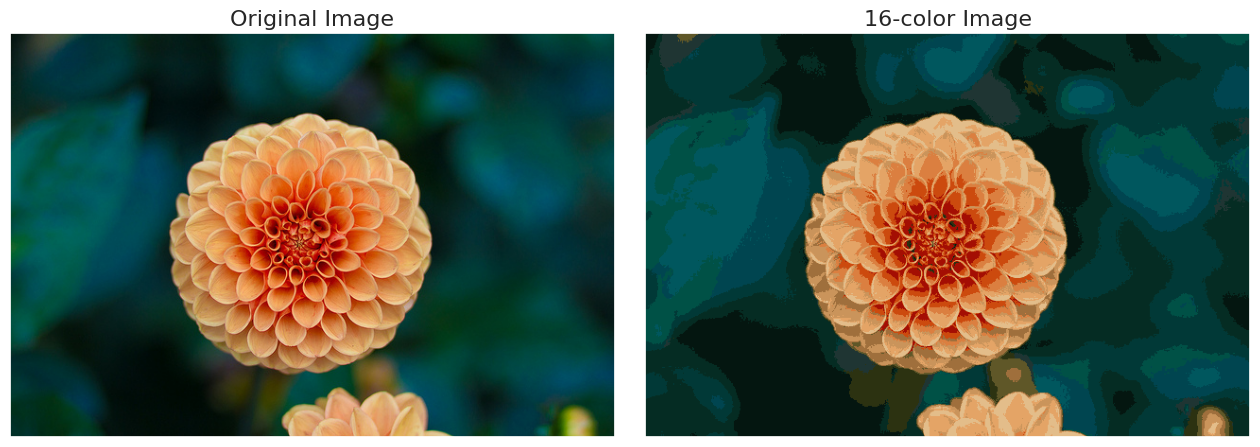

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# PRAKTIKUM 3

Pembuatan Dataset Sintetis

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)


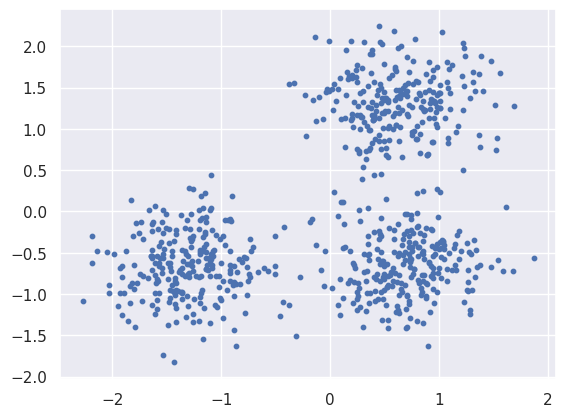

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()


Compute DBSCAN

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Evaluasi Kualitas Klasterisasi

In [ ]:
from sklearn import metrics

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information: "
    f"{metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


Visualisasi Hasil Klasterisasi

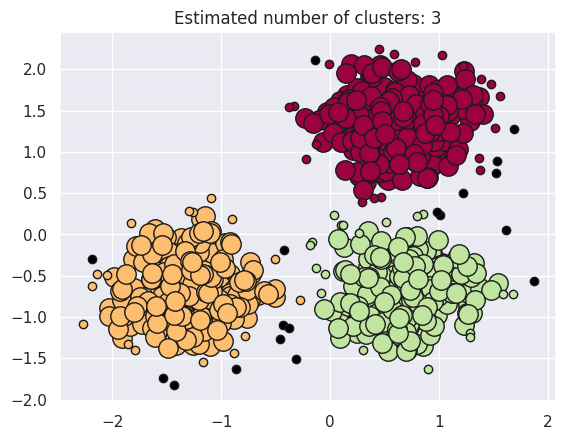

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Jalankan DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Buat mask core sample
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Hitung jumlah cluster (tanpa noise)
unique_labels = set(labels)
n_clusters_ = len([k for k in unique_labels if k != -1])

# Buat warna untuk setiap cluster
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot hasil clustering
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


# Tugas Praktikum

1. Tugas K-Means

In [ ]:
df = pd.read_csv('/Mall_Customers.csv')

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

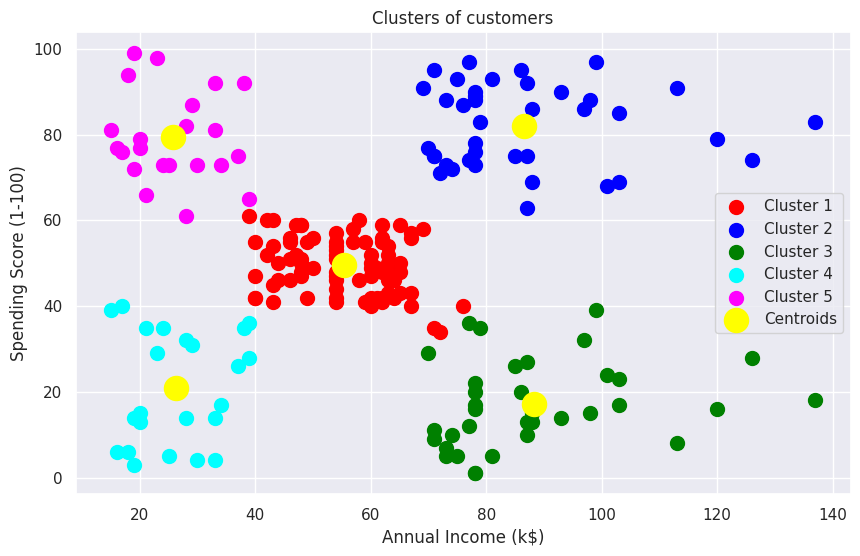

In [ ]:
# 2. Menentukan fitur yang tepat untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Membuat model K-Means dengan mempertimbangkan jumlah k yang terbaik
# Menggunakan metode Elbow untuk menemukan jumlah k yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Membuat model K-Means dengan k=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

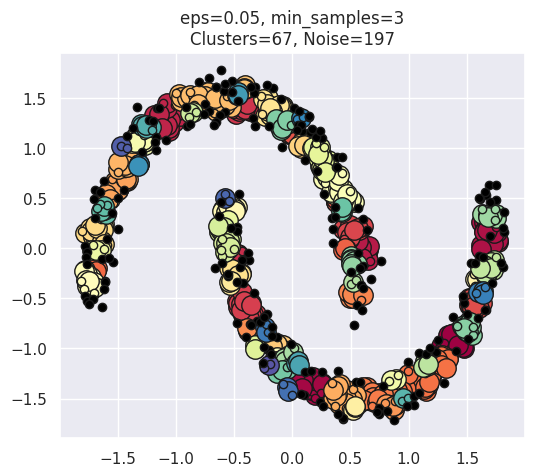

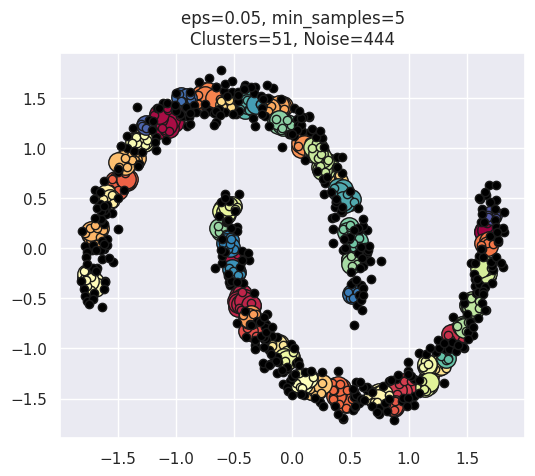

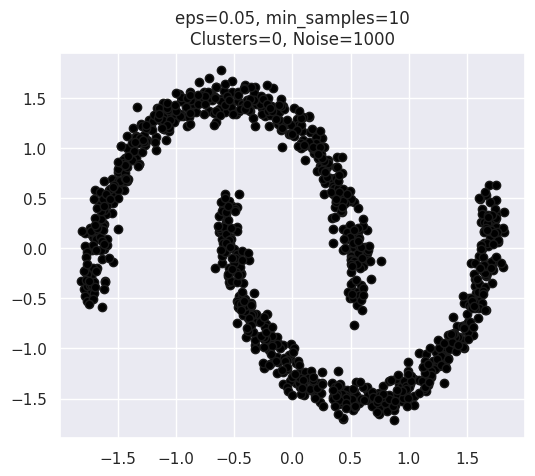

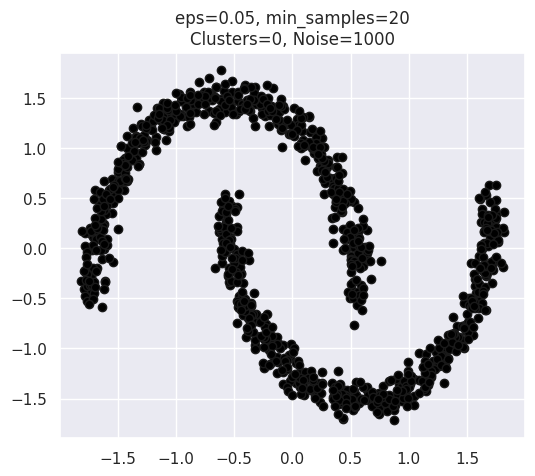

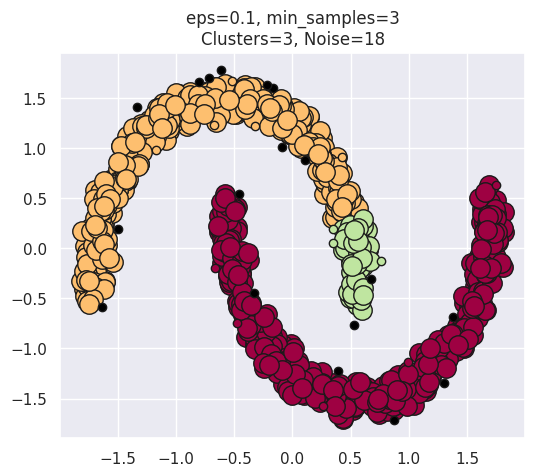

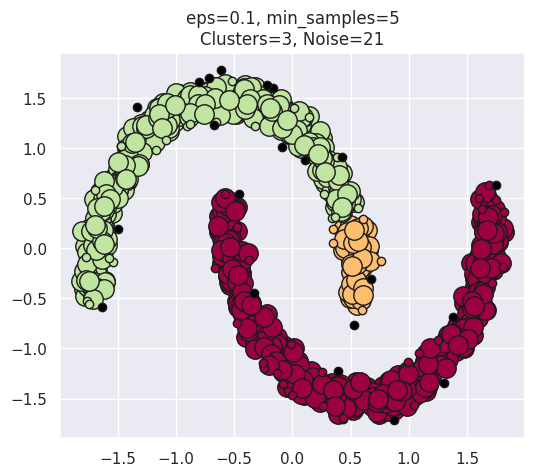

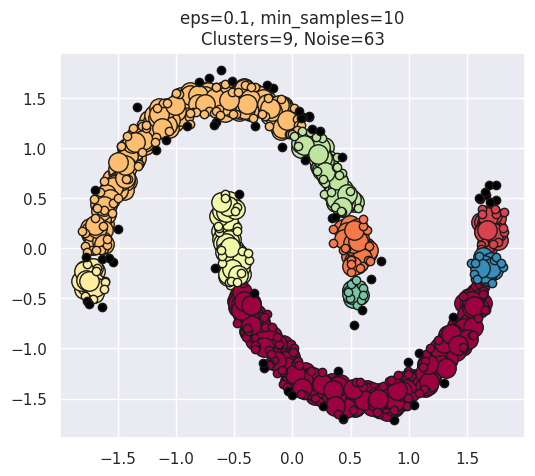

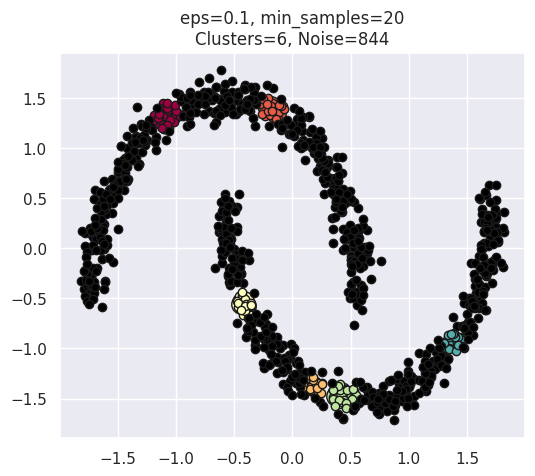

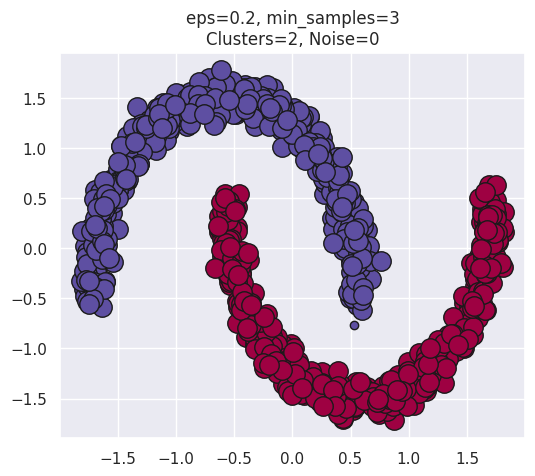

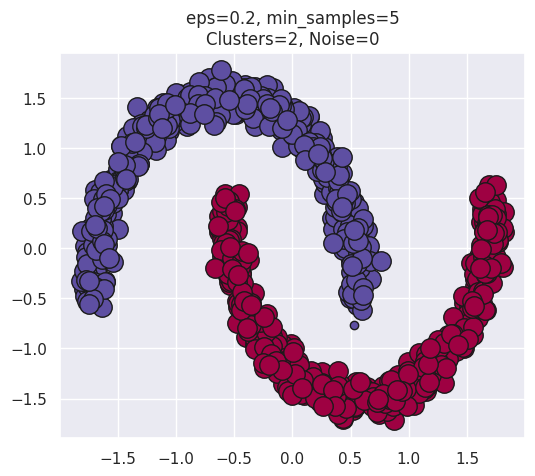

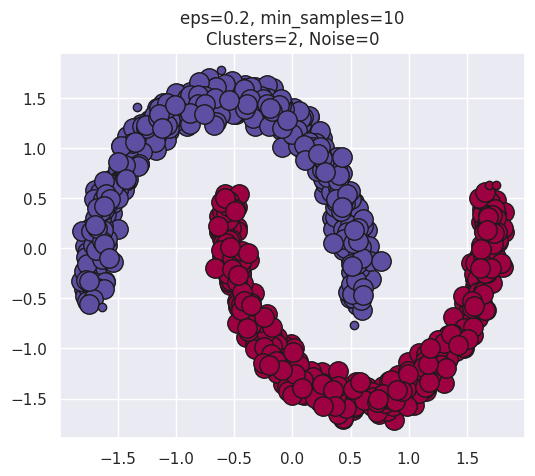

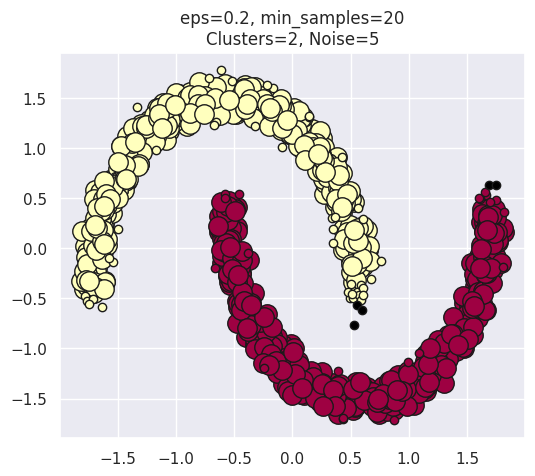

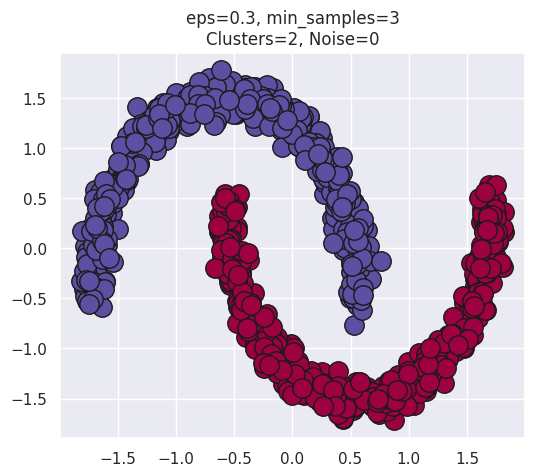

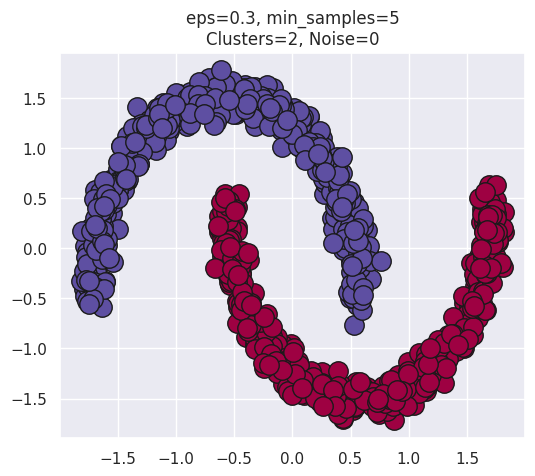

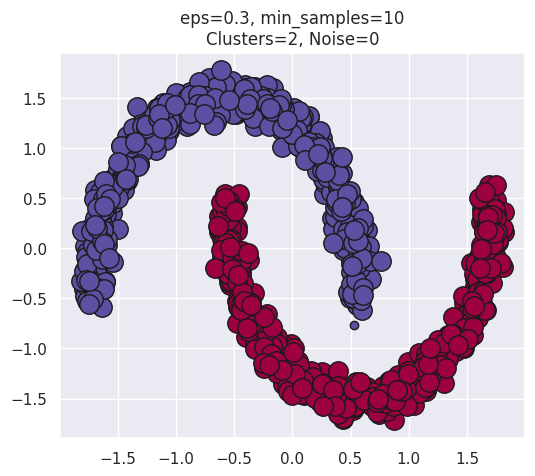

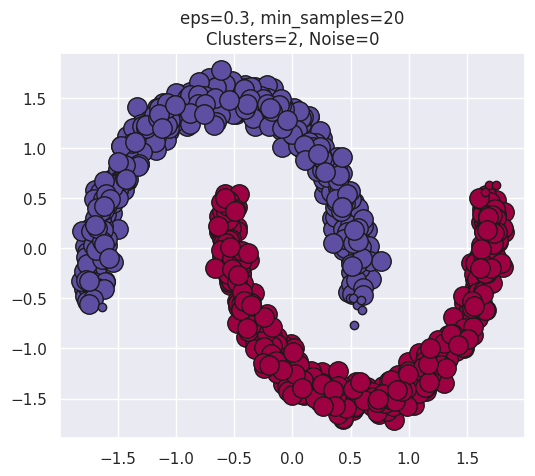

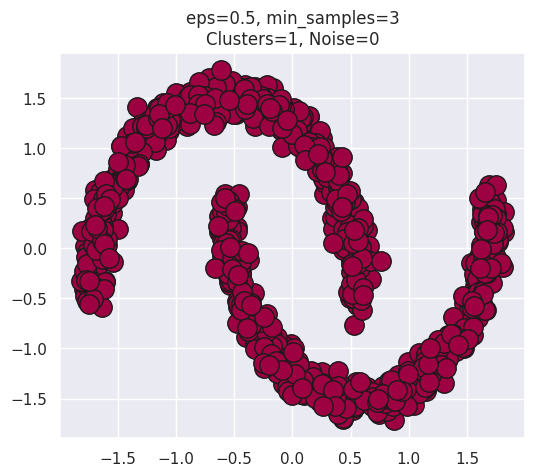

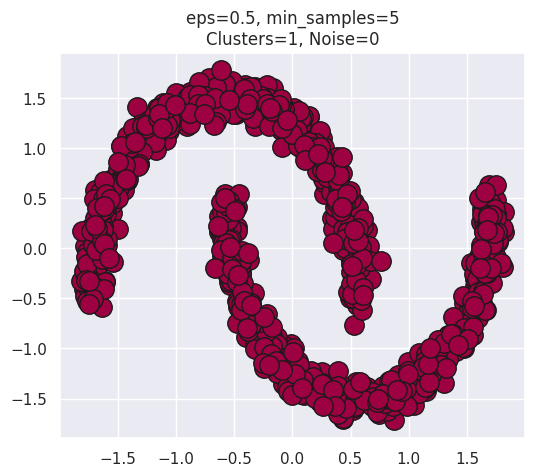

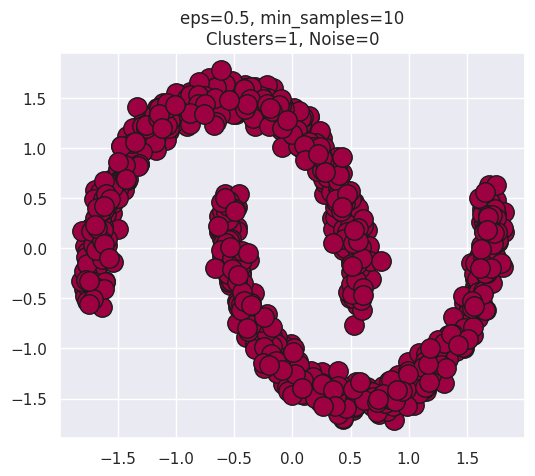

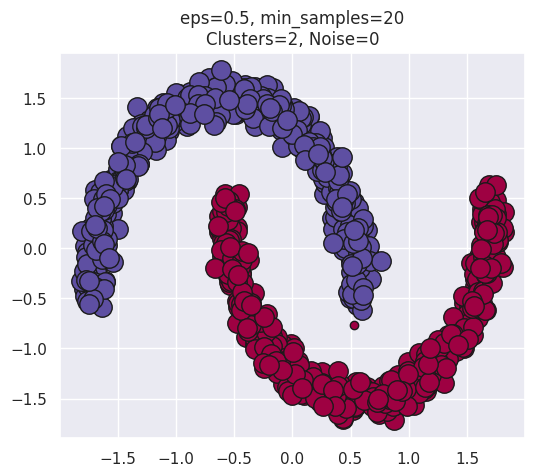

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        67    197     0.803825      0.154915   0.259767   
1   0.05            5        51    444     0.556006      0.137314   0.220237   
2   0.05           10         0   1000    -1.000000     -1.000000  -1.000000   
3   0.05           20         0   1000    -1.000000     -1.000000  -1.000000   
4   0.10            3         3     18     0.983471      0.708395   0.823571   
5   0.10            5         3     21     0.980716      0.699589   0.816635   
6   0.10           10         9     63     0.938949      0.358282   0.518656   
7   0.10           20         6    844     0.157108      0.153385   0.155224   
8   0.20            3         2      0     1.000000      1.000000   1.000000   
9   0.20            5         2      0     1.000000      1.000000   1.000000   
10  0.20           10         2      0     1.000000      1.000000   1.000000   
11  0.20           20         2      5  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 1. Buat dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# 2. Fungsi untuk menjalankan DBSCAN dan evaluasi
def run_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # core sample mask
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Hitung jumlah cluster (kecuali noise = -1)
    unique_labels = set(labels)
    n_clusters_ = len([k for k in unique_labels if k != -1])
    n_noise_ = list(labels).count(-1)

    # Evaluasi metrik (jika cluster > 1 agar Silhouette valid)
    if n_clusters_ > 1:
        homogeneity = metrics.homogeneity_score(labels_true, labels)
        completeness = metrics.completeness_score(labels_true, labels)
        v_measure = metrics.v_measure_score(labels_true, labels)
        ari = metrics.adjusted_rand_score(labels_true, labels)
        ami = metrics.adjusted_mutual_info_score(labels_true, labels)
        silhouette = metrics.silhouette_score(X, labels)
    else:
        homogeneity = completeness = v_measure = ari = ami = silhouette = -1

    # Visualisasi
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(6, 5))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # hitam untuk noise
        class_member_mask = (labels == k)

        # core samples
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        # non-core samples
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"eps={eps}, min_samples={min_samples}\nClusters={n_clusters_}, Noise={n_noise_}")
    plt.show()

    return {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters_,
        "noise": n_noise_,
        "homogeneity": homogeneity,
        "completeness": completeness,
        "v_measure": v_measure,
        "ARI": ari,
        "AMI": ami,
        "silhouette": silhouette,
    }

# 3. Eksperimen
results = []
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        res = run_dbscan(X, eps, ms)
        results.append(res)

# 4. Rekap hasil
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


2. Tugas DBSCAN

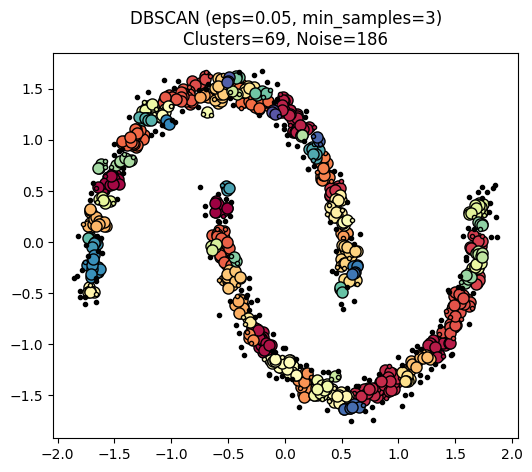

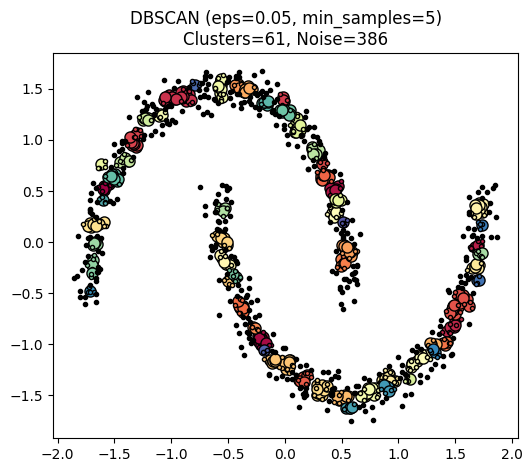

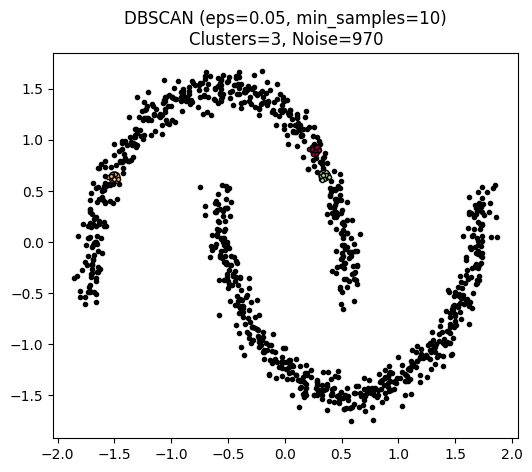

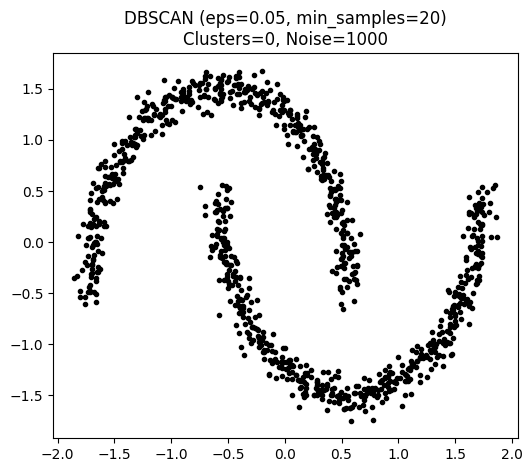

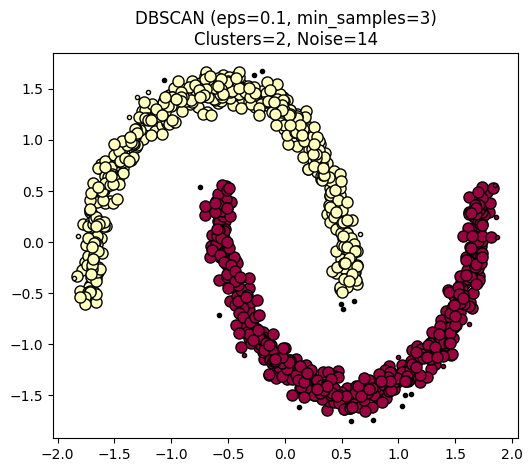

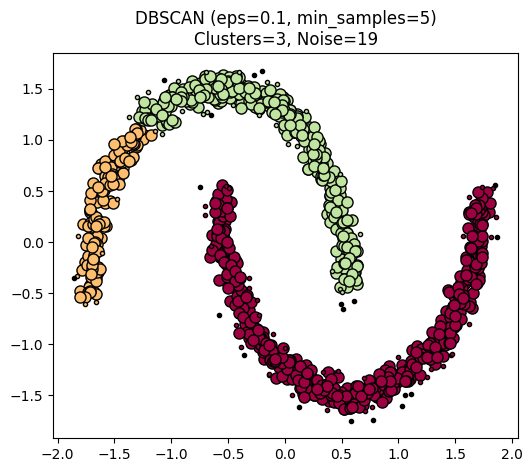

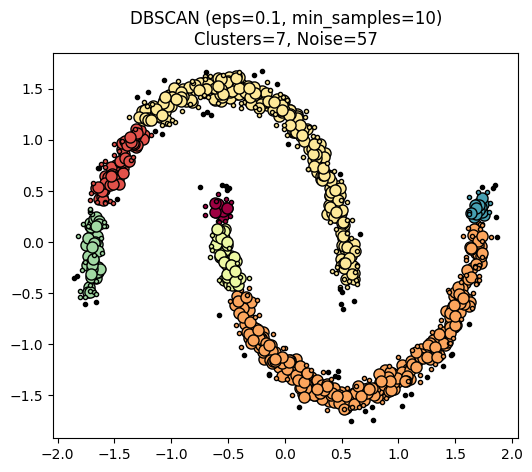

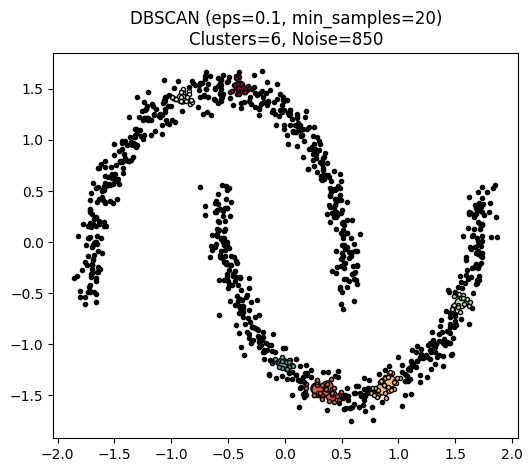

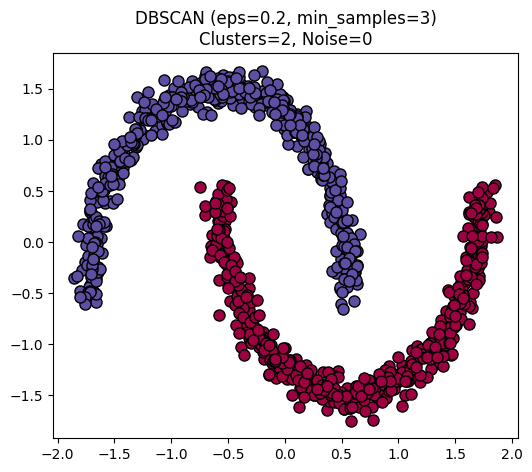

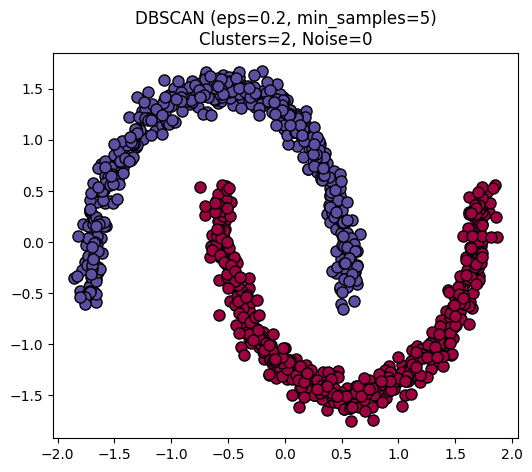

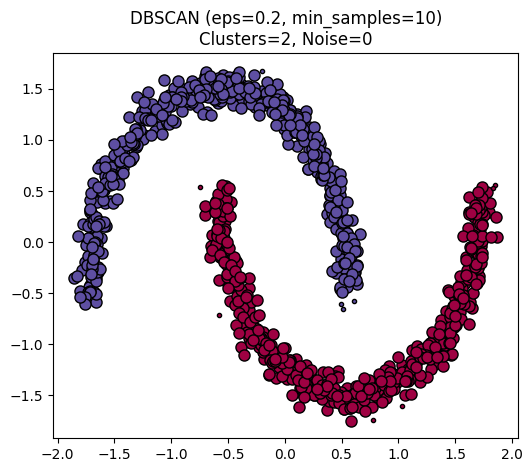

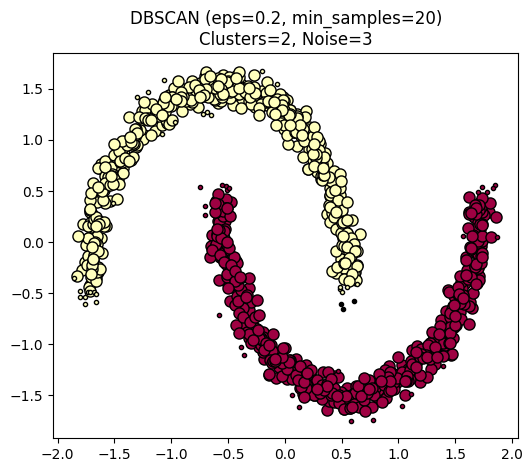

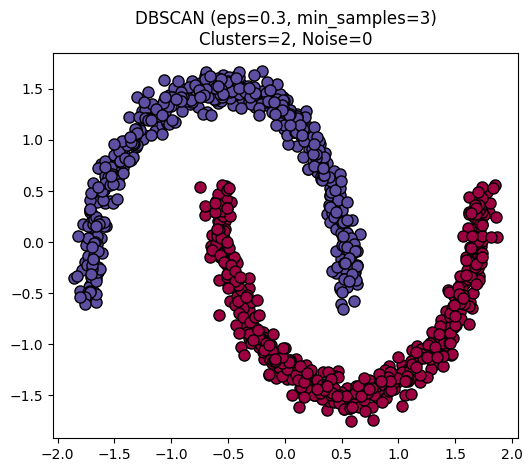

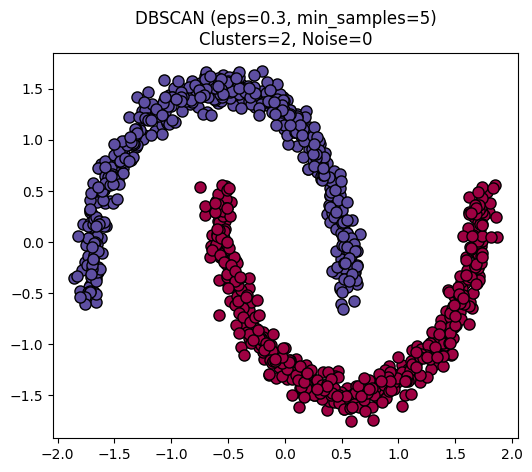

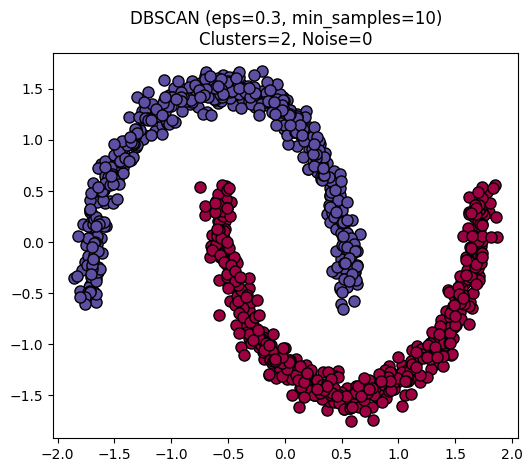

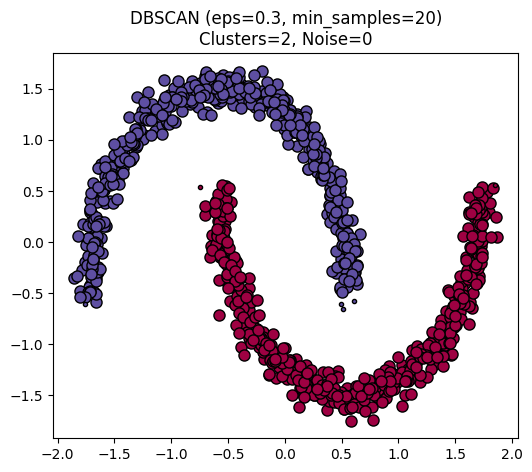

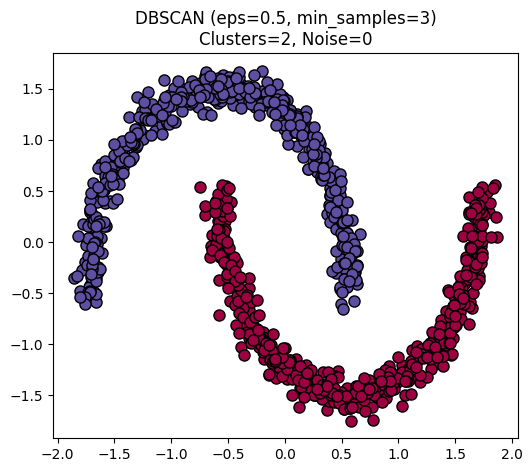

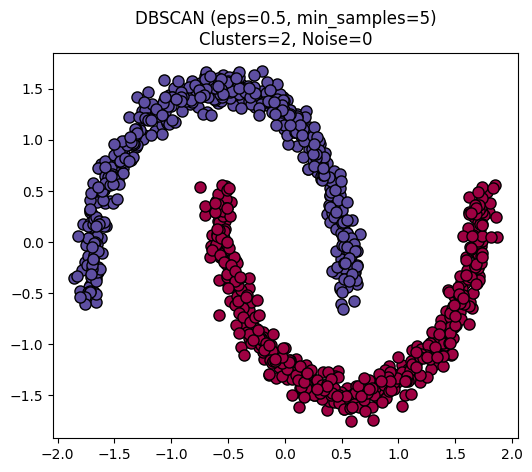

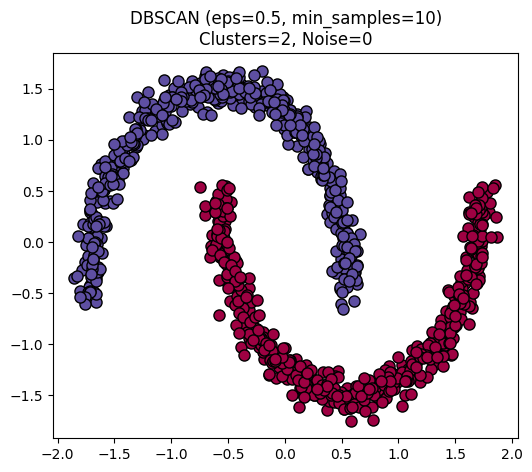

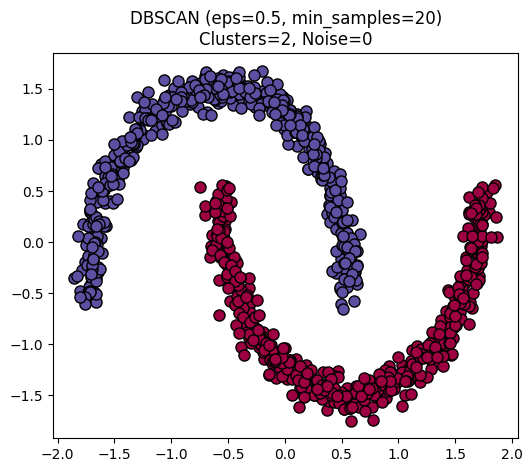

eps  min_samples  clusters  noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05            5        61    386     0.615466      0.136931   0.224021   
2   0.05           10         3    970     0.030669      0.126764   0.049389   
3   0.05           20         0   1000          NaN           NaN        NaN   
4   0.10            3         2     14     0.986207      0.902896   0.942714   
5   0.10            5         3     19     0.981343      0.632772   0.769420   
6   0.10           10         7     57     0.943317      0.409546   0.571132   
7   0.10           20         6    850     0.153928      0.155466   0.154693   
8   0.20            3         2      0     1.000000      1.000000   1.000000   
9   0.20            5         2      0     1.000000      1.000000   1.000000   
10  0.20           10         2      0     1.000000      1.000000   1.000000   
11  0.20           20         2      3     1.000000      0.974224   0.986944   
12  0.30            3         2      0     1.000000      1.000000   1.000000   
13  0.30            5         2      0     1.000000      1.000000   1.000000   
14  0.30           10         2      0     1.000000      1.000000   1.000000   
15  0.30           20         2      0     1.000000      1.000000   1.000000   
16  0.50            3         2      0     1.000000      1.000000   1.000000   
17  0.50            5         2      0     1.000000      1.000000   1.000000   
18  0.50           10         2      0     1.000000      1.000000   1.000000   
19  0.50           20         2      0     1.000000      1.000000   1.000000   

         ARI       AMI  Silhouette  
0   0.030044  0.243805    0.112929  
1   0.015642  0.210259   -0.048518  
2   0.002283  0.045864   -0.294190  
3        NaN       NaN         NaN  
4   0.972179  0.942634    0.251690  
5   0.758440  0.769024    0.290689  
6   0.523399  0.569801    0.162306  
7   0.016754  0.150916   -0.360195  
8   1.000000  1.000000    0.391160  
9   1.000000  1.000000    0.391160  
10  1.000000  1.000000    0.391160  
11  0.994030  0.986923    0.027580  
12  1.000000  1.000000    0.391160  
13  1.000000  1.000000    0.391160  
14  1.000000  1.000000    0.391160  
15  1.000000  1.000000    0.391160  
16  1.000000  1.000000    0.391160  
17  1.000000  1.000000    0.391160  
18  1.000000  1.000000    0.391160  
19  1.000000  1.000000    0.391160

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)
import pandas as pd

# 1. Membuat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definisikan kombinasi parameter
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

results = []

# 4. Jalankan DBSCAN untuk setiap kombinasi
for eps in eps_values:
    for min_s in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_scaled)

        # Hitung jumlah klaster (tidak termasuk noise = -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi hanya jika ada lebih dari 1 klaster
        if n_clusters > 1:
            hom = homogeneity_score(y_true, labels)
            com = completeness_score(y_true, labels)
            vms = v_measure_score(y_true, labels)
            ari = adjusted_rand_score(y_true, labels)
            ami = adjusted_mutual_info_score(y_true, labels)
            sil = silhouette_score(X_scaled, labels)
        else:
            hom = com = vms = ari = ami = sil = np.nan

        results.append({
            'eps': eps,
            'min_samples': min_s,
            'clusters': n_clusters,
            'noise': n_noise,
            'Homogeneity': hom,
            'Completeness': com,
            'V-measure': vms,
            'ARI': ari,
            'AMI': ami,
            'Silhouette': sil
        })

        # 5. Visualisasi hasil DBSCAN
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        if hasattr(dbscan, 'core_sample_indices_'):
            core_samples_mask[dbscan.core_sample_indices_] = True

        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        plt.figure(figsize=(6, 5))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Warna hitam untuk noise
                col = [0, 0, 0, 1]
            class_member_mask = (labels == k)

            # Titik inti (core)
            xy = X_scaled[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=8)

            # Titik non-core
            xy = X_scaled[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=3)

        plt.title(f"DBSCAN (eps={eps}, min_samples={min_s})\n"
                  f"Clusters={n_clusters}, Noise={n_noise}")
        plt.show()

df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
display(df_results)